In [25]:
#!pip install pvlib


In [26]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.location import Location

In [27]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pvlib
from pvlib.location import Location
import sympy as sp


In [28]:
# Definition of Location oject. Coordinates and elevation of Madrid Ciemat Headquarters (Spain)
site = Location(40.456, -3.73, 'Etc/GMT+1', 651, 'Ciemat (Madrid, ES)') # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
times = pd.date_range('2018-01-01 00:00:00', '2018-12-31 23:59:00', freq='H', tz=site.tz)

# Estimate Solar Position with the 'Location' object
solpos = site.get_solarposition(times)

# Visualize the resulting DataFrame
solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2018-01-01 00:00:00-01:00,160.468395,160.468395,-70.468395,-70.468395,29.900075,-3.346090
2018-01-01 01:00:00-01:00,152.396698,152.396698,-62.396698,-62.396698,58.528284,-3.365720
2018-01-01 02:00:00-01:00,141.889229,141.889229,-51.889229,-51.889229,75.239601,-3.385340
2018-01-01 03:00:00-01:00,130.627975,130.627975,-40.627975,-40.627975,86.856662,-3.404951
2018-01-01 04:00:00-01:00,119.234764,119.234764,-29.234764,-29.234764,96.389095,-3.424553


In [29]:
solpos2=site.get_solarposition('2017-01-01 00:30:30')
solpos2

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2017-01-01 00:30:30,162.355692,162.355692,-72.355692,-72.355692,9.243957,-3.447939


In [30]:
# Alternative method using the 'solarposition.get_solarposition' function
solpos = pvlib.solarposition.get_solarposition(times, site.latitude, site.longitude, site.altitude)

solpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2018-01-01 00:00:00-01:00,160.468395,160.468395,-70.468395,-70.468395,29.900075,-3.346090
2018-01-01 01:00:00-01:00,152.396698,152.396698,-62.396698,-62.396698,58.528284,-3.365720
2018-01-01 02:00:00-01:00,141.889229,141.889229,-51.889229,-51.889229,75.239601,-3.385340
2018-01-01 03:00:00-01:00,130.627975,130.627975,-40.627975,-40.627975,86.856662,-3.404951
2018-01-01 04:00:00-01:00,119.234764,119.234764,-29.234764,-29.234764,96.389095,-3.424553


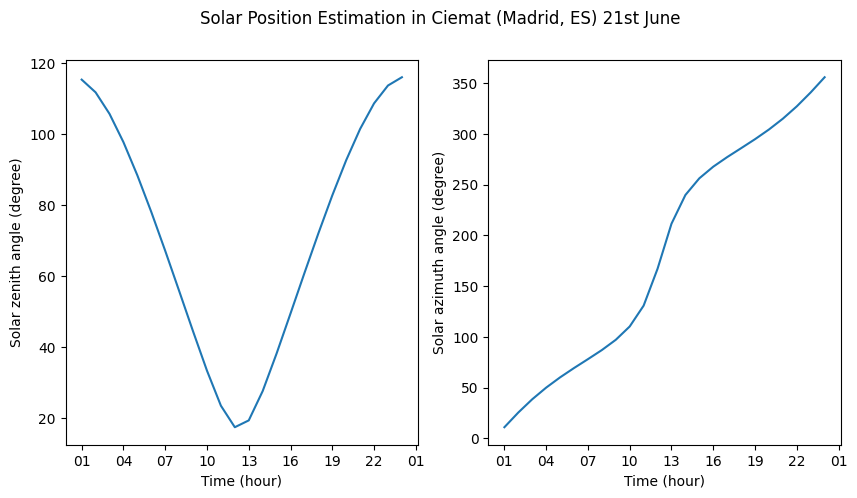

In [31]:
import matplotlib.dates as mdates

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Solar Position Estimation in ' + site.name + ' 21st June')

# plot for solar zenith angle
ax1.plot(solpos.loc['2018-06-21'].zenith)
ax1.set_ylabel('Solar zenith angle (degree)')
ax1.set_xlabel('Time (hour)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# plot for solar azimuth angle
ax2.plot(solpos.loc['2018-06-21'].azimuth)
ax2.set_ylabel('Solar azimuth angle (degree)')
ax2.set_xlabel('Time (hour)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

In [32]:
# Lyngby 
lyngbysite = Location(55.7704, 12.50378, 'Europe/Copenhagen', 29, 'Lyngby (Copenhagen, DK)') # latitude, longitude, time_zone, altitude, name

# Definition of a time range of simulation
dato = pd.date_range('2024-04-20 00:00:00', '2024-04-20 23:59:59', freq='H', tz=lyngbysite.tz)

# Estimate Solar Position with the 'Location' object
lyngbysolpos = lyngbysite.get_solarposition(dato)

# Visualize the resulting DataFrame
lyngbysolpos.head()

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2024-04-20 00:00:00+02:00,111.119385,111.119385,-21.119385,-21.119385,341.879320,1.077849
2024-04-20 01:00:00+02:00,112.605803,112.605803,-22.605803,-22.605803,357.638594,1.086561
2024-04-20 02:00:00+02:00,111.773123,111.773123,-21.773123,-21.773123,13.489220,1.095260
2024-04-20 03:00:00+02:00,108.714334,108.714334,-18.714334,-18.714334,28.814197,1.103948
2024-04-20 04:00:00+02:00,103.741713,103.741713,-13.741713,-13.741713,43.221416,1.112623


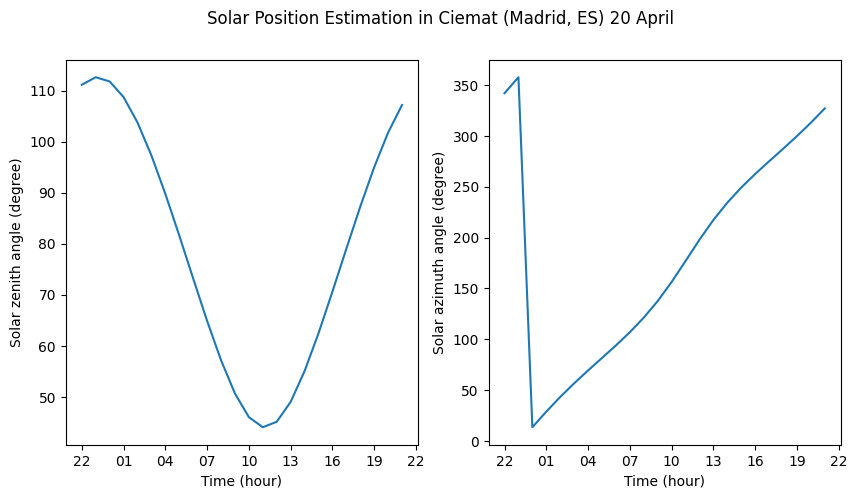

In [33]:
import matplotlib.dates as mdates

# Plots for solar zenith and solar azimuth angles
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Solar Position Estimation in ' + site.name + ' 20 April')

# plot for solar zenith angle
ax1.plot(lyngbysolpos.loc['2024-04-20'].zenith)
ax1.set_ylabel('Solar zenith angle (degree)')
ax1.set_xlabel('Time (hour)')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

# plot for solar azimuth angle
ax2.plot(lyngbysolpos.loc['2024-04-20'].azimuth)
ax2.set_ylabel('Solar azimuth angle (degree)')
ax2.set_xlabel('Time (hour)')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%H'))

In [34]:
from math import pi,sin,cos
zenit=lyngbysolpos['zenith']
azimut=lyngbysolpos['azimuth']
elevation=lyngbysolpos['apparent_elevation']
Mz=zenit.mean()                         #Mz
zenitmax=zenit.max()
zenitmin=zenit.min()
zenitmin,zenitmax
zenitvariation=zenitmax-zenitmin
Az=zenitvariation/2                      #Az
Wz=(2*pi)/24                            #Wz
Tz=lyngbysolpos['equation_of_time']     #Tz
phi_s=azimut
sin(phi_s[11]*(pi/180))
sinphi=[]
for elements in phi_s:
    sinphi.append(sin(elements*(pi/180)))
(zenitmax-zenitmin)/2
# nu skal der findes en funktion sin(a*t+b), som ligner denne funktion så meget som muligt. 
# jeg har omdannet vinklerne til at være i minusgrader for de to første vinkler, sådan så man kan lave lineær regression på det. Det gør ikke nogen forskel for sinusfunktionen. 

C:\Users\olive\AppData\Local\Temp\ipykernel_13864\1448590471.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sin(phi_s[11]*(pi/180))


34.28554760806754

In [35]:
import numpy as np
t=lyngbysolpos.index.astype(np.int64) / 1e9
t=t-t[0]
t=t/60
t

Index([   0.0,   60.0,  120.0,  180.0,  240.0,  300.0,  360.0,  420.0,  480.0,
        540.0,  600.0,  660.0,  720.0,  780.0,  840.0,  900.0,  960.0, 1020.0,
       1080.0, 1140.0, 1200.0, 1260.0, 1320.0, 1380.0],
      dtype='float64')

In [36]:
a, b = np.polyfit(t, phi_s, 1)
print(f"Ligning: phi(t) = {a:.6f} * t + {b:.2f}")
a=a
a

atb=[]
for i in range (24):
    atb.append(a*i*60+b)
atb

Ligning: phi(t) = 0.141694 * t + 87.56


[87.55854317664102,
 96.06020490000043,
 104.56186662335982,
 113.06352834671921,
 121.56519007007861,
 130.06685179343802,
 138.5685135167974,
 147.0701752401568,
 155.5718369635162,
 164.0734986868756,
 172.57516041023501,
 181.07682213359442,
 189.5784838569538,
 198.08014558031317,
 206.58180730367258,
 215.08346902703198,
 223.5851307503914,
 232.08679247375076,
 240.58845419711017,
 249.09011592046957,
 257.591777643829,
 266.09343936718835,
 274.5951010905478,
 283.09676281390716]

In [37]:
a,b

(0.14169436205598995, 87.55854317664102)

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Lav x-aksen: tidspunkter i timer – her 0 til 22, siden range(23)
t_timer = list(range(24))

# phi_s skal have tilsvarende værdier – fx de første 23 værdier
phi_s_subset = phi_s.iloc[:24]  # eller [:len(atb)] for fleksibilitet

# Plot begge kurver (CHATGPTS GRAF, SKAL IKKE BRUGES UMIDDELBART)
#plt.figure(figsize=(10, 6))
#plt.plot(t_timer, atb, label='Model: a*t + b', linestyle='--', color='red')
#plt.plot(t_timer, phi_s_subset, label='Målte værdier (phi_s)', marker='o', color='blue')
#plt.title('Sammenligning: Lineær model vs. målt phi(t)')
#plt.xlabel('Tid (timer)')
#plt.ylabel('Vinkel (grader)')
#plt.legend()
#plt.grid(True)
# på modellen kan man se et mønster, der er en systematisk afvigelse mellem data og model. Det kunne altså være bedre med en anden model, 
# altså med en anden slags regression. 

In [39]:
sinatb=[]
for elements in atb:
    sinatb.append(sin(elements*(pi/180)))
sinatb,sinphi

sindifferens=[]
for i in range (len(sinatb)):
    sindifferens.append(sinatb[i]-sinphi[i])


In [40]:
#SINUSDIFFERENS, SKAL IKKE UMIDDELBART BRUGES
#plt.plot(t_timer, sindifferens,'o',label='differens', linestyle='--', color='red')
#plt.grid(True)
#plt.legend()
#plt.show()
#Her kan man se tydeligt at afvigelsen ikke er så tilfældig. (atb funktionen) 

In [41]:
Tz.min()*60,Tz.max()*60


(64.67093683284475, 76.50860580964945)

Zenitvinkel = 90° at t = 5.92 and t = 20.46 hours


C:\Users\olive\AppData\Local\Temp\ipykernel_13864\1318749832.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  z.append(zenit[i])


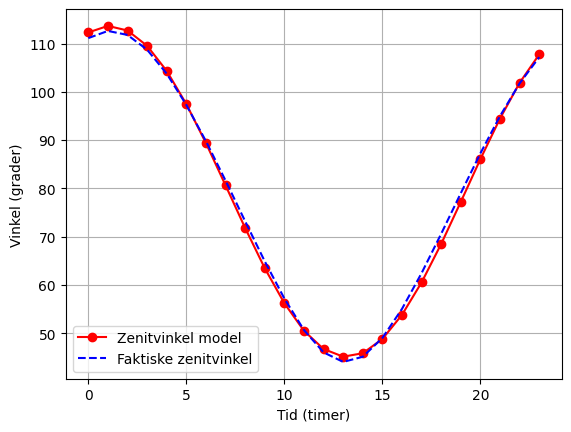

In [ ]:
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
def zenitvinkel(t):
    return Mz+Az*np.cos(Wz*(t-(Tz.iloc[t])))
zenitvinkel(22)

y=[]
for i in range (24):
    y.append(zenitvinkel(i))

z=[]
for i in range (24):
    z.append(zenit[i])



Tz_interp = interp1d(np.arange(len(Tz)), Tz.values, kind='linear', fill_value='extrapolate')

def zenitvinkel_float(t):
    return Mz + Az * np.cos(Wz * (t - Tz_interp(t)))

# Funktion til zenitvinkel(t) = 90
def equation(t):
    return zenitvinkel_float(t) - 90

# løsning for de to tidspunkter ved 90 grader
t_morgen = fsolve(equation, 9)[0]
t_aften = fsolve(equation, 24)[0]

print(f"Zenitvinkel = 90 grader ved t = {t_morgen:.2f} og t = {t_aften:.2f} timer")

x=np.arange(24)
plt.plot(x,y,'o',label='Zenitvinkel model',linestyle='-',color='red')
plt.plot(x,z,label='Faktiske zenitvinkel',linestyle='--',color='blue')
plt.xlabel('Tid (timer)')
plt.ylabel('Vinkel (grader)')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\olive\AppData\Local\Temp\ipykernel_13864\4207098566.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  zenitafvigelse.append(y[i]-zenit[i])


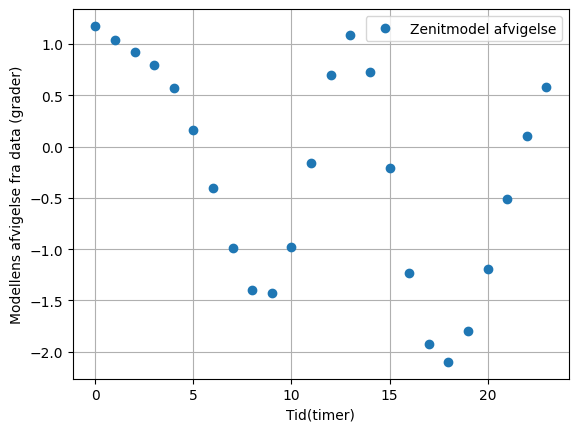

In [43]:
#Zenitmodel afvigelse
zenitafvigelse=[]
for i in range(len(zenit)):
    zenitafvigelse.append(y[i]-zenit[i])

plt.plot(x,zenitafvigelse,'o',label='Zenitmodel afvigelse')
plt.legend()
plt.grid(True)
plt.xlabel('Tid(timer)')
plt.ylabel('Modellens afvigelse fra data (grader)')
plt.show()

C:\Users\olive\AppData\Local\Temp\ipykernel_13864\1193937126.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  graderdifferens.append(atb[i]-phi_s[i])


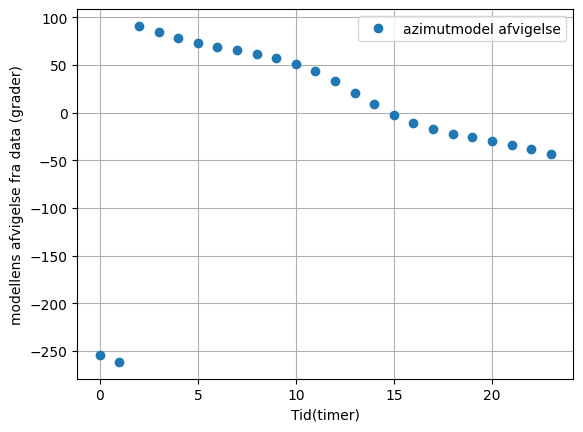

[87.55854317664102,
 96.06020490000043,
 104.56186662335982,
 113.06352834671921,
 121.56519007007861,
 130.06685179343802,
 138.5685135167974,
 147.0701752401568,
 155.5718369635162,
 164.0734986868756,
 172.57516041023501,
 181.07682213359442,
 189.5784838569538,
 198.08014558031317,
 206.58180730367258,
 215.08346902703198,
 223.5851307503914,
 232.08679247375076,
 240.58845419711017,
 249.09011592046957,
 257.591777643829,
 266.09343936718835,
 274.5951010905478,
 283.09676281390716]

In [44]:
#Azimutmodel afvigelse
graderdifferens=[]
for i in range (len(atb)):
    graderdifferens.append(atb[i]-phi_s[i])
graderdifferens

sum=0
for i in range (len(graderdifferens)):
    sum+=abs(graderdifferens[i])
middeldifferens=sum/len(graderdifferens)
middeldifferens # dette er så meget modellen i gennemsnit afviger fra de ægte data i grader. 
plt.plot(x,graderdifferens,'o', label='azimutmodel afvigelse',linestyle='none')
plt.legend()
plt.xlabel('Tid(timer)')
plt.ylabel('modellens afvigelse fra data (grader)')
plt.grid(True)
plt.show()

atb

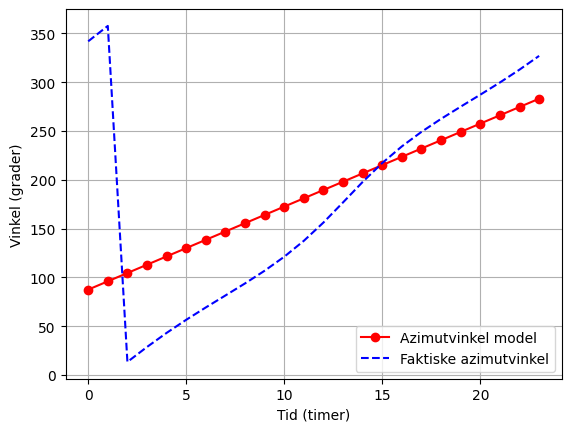

[87.55854317664102,
 96.06020490000043,
 104.56186662335982,
 113.06352834671921,
 121.56519007007861,
 130.06685179343802,
 138.5685135167974,
 147.0701752401568,
 155.5718369635162,
 164.0734986868756,
 172.57516041023501,
 181.07682213359442,
 189.5784838569538,
 198.08014558031317,
 206.58180730367258,
 215.08346902703198,
 223.5851307503914,
 232.08679247375076,
 240.58845419711017,
 249.09011592046957,
 257.591777643829,
 266.09343936718835,
 274.5951010905478,
 283.09676281390716]

In [45]:
plt.plot(x,atb,'o',label='Azimutvinkel model',linestyle='-',color='red')
plt.plot(x,azimut,label='Faktiske azimutvinkel',linestyle='--',color='blue')
plt.xlabel('Tid (timer)')
plt.ylabel('Vinkel (grader)')
plt.grid(True)
plt.legend()
plt.show()
atb

Model: y = 75.71 * sin(0.3008 * t + -1.05) + 6.34


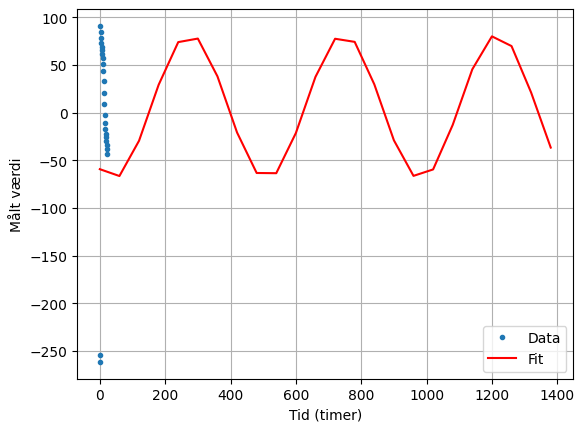

[146.84000211374706,
 162.52487318896968,
 134.0265024460529,
 83.79855971749758,
 47.48142312887968,
 52.2736228572693,
 100.42626597850959,
 167.8769399621757,
 218.85211786740894,
 227.57651666324426,
 193.91496715248093,
 143.45444213012792,
 111.97646354476929,
 123.74289236456426,
 176.77248701816592,
 244.04323055867843,
 289.8907878078991,
 291.6516000648738,
 253.41638828901634,
 203.54767695949397,
 177.46784268432225,
 196.16285335887636,
 253.44682003707683,
 319.7159370973287]

In [46]:
#Azimutmodel optimering:
from scipy.optimize import curve_fit

# F.eks. data med periodisk karakter
tid = x


# Definér din model: en sinusbølge
def model(t, A, B, C, D):
    return A * np.sin(B * t + C) + D

# Fit modellen til dine data
popt, pcov = curve_fit(model, tid, graderdifferens, p0=[10, 2*np.pi/24, 0, 5])

# popt indeholder: A, B, C, D
A_fit, B_fit, C_fit, D_fit = popt
print(f"Model: y = {A_fit:.2f} * sin({B_fit:.4f} * t + {C_fit:.2f}) + {D_fit:.2f}")

# Plot resultater
plt.plot(tid, graderdifferens, 'o', label='Data', markersize=3)
plt.plot(t, model(t, *popt), 'r-', label='Fit')
plt.legend()
plt.xlabel('Tid (timer)')
plt.ylabel('Målt værdi')
plt.grid(True)
plt.show()

model(t,*popt)

korrigeringsliste=[]
for elements in model(t,*popt):
    korrigeringsliste.append(elements)
korrigeringsliste+graderdifferens

korrigeretazimut=[]
for i in range (24):
    korrigeretazimut.append(atb[i]-korrigeringsliste[i])

korrigeretazimut

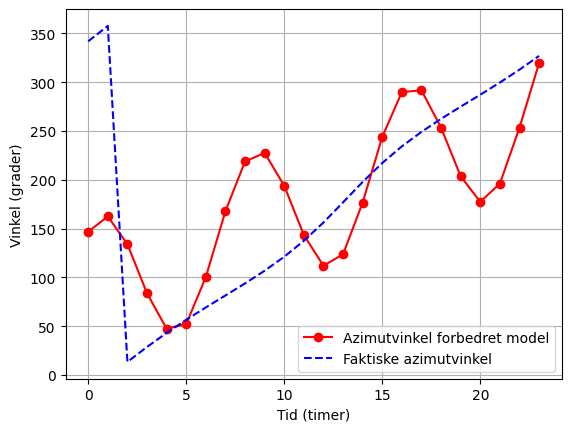

In [47]:
#plotter den korrigerede azimutmodel
plt.plot(x,korrigeretazimut,'o',label='Azimutvinkel forbedret model',linestyle='-',color='red')
plt.plot(x,azimut,label='Faktiske azimutvinkel',linestyle='--',color='blue')
plt.xlabel('Tid (timer)')
plt.ylabel('Vinkel (grader)')
plt.grid(True)
plt.legend()
plt.show()

C:\Users\olive\AppData\Local\Temp\ipykernel_13864\2140944667.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  korrigeretafvigelse.append(azimut[i]-korrigeretazimut[i])


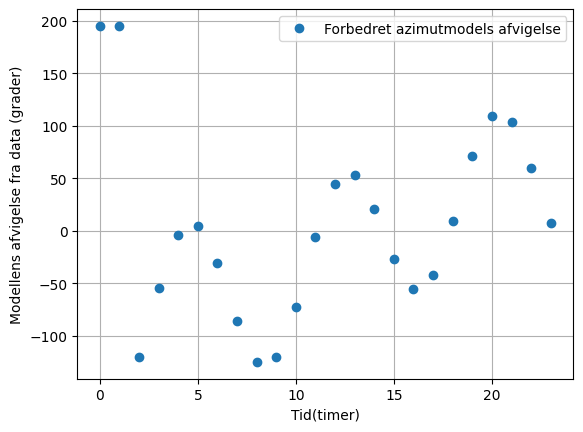

In [48]:
korrigeretafvigelse=[]
for i in range (24):
    korrigeretafvigelse.append(azimut[i]-korrigeretazimut[i])
korrigeretafvigelse

plt.plot(x,korrigeretafvigelse,'o',label='Forbedret azimutmodels afvigelse')
plt.xlabel('Tid(timer)')
plt.ylabel('Modellens afvigelse fra data (grader)')
plt.grid(True)
plt.legend()
plt.show()